In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
data= pd.read_csv('Spotify_Youtube.csv')
data.head()
data.shape

(20718, 28)

In [34]:
# Group by artist and calculate the number of unique album types for each artist
artist_counts = data.groupby('Artist')['Album_type'].nunique()

# Select artists with both singles and albums
artists_with_both = artist_counts[artist_counts == 2].index.tolist()

# Filter the original dataset to include only the rows corresponding to the selected artists
df_filtered = data[data['Artist'].isin(artists_with_both)]

artist_streams = df_filtered.groupby('Artist')['Stream'].sum()

sorted_artists = artist_streams.sort_values(ascending=False)
top_30_artists = sorted_artists.head(30).index.tolist()

# Display the resulting DataFrame with all songs by the top 30 artists that have both singles and albums
#top_30_artists

# Create a dictionary to store DataFrames for each top artist
artist_dfs = {}

# Iterate over the top artists
for artist in top_30_artists:
    # Filter the dataset for the current artist
    artist_df = df_filtered[df_filtered['Artist'] == artist]
    
    # Store the DataFrame in the dictionary
    artist_dfs[artist] = artist_df

final_df = pd.concat(artist_dfs.values(), ignore_index=True)
final_df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,12449,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Perfect,÷ (Deluxe),album,spotify:track:0tgVpDi06FyKpA1z0VMD4v,0.599,0.448,8.0,...,https://www.youtube.com/watch?v=2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,3.361086e+09,19033010.0,486143.0,The official music video for Ed Sheeran - Perf...,True,True,2.312690e+09
1,12450,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Bad Habits,=,album,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.807,0.893,11.0,...,https://www.youtube.com/watch?v=orJSJGHjBLI,Ed Sheeran - Bad Habits [Official Video],Ed Sheeran,4.761636e+08,4193306.0,149738.0,The official video for Ed Sheeran - Bad Habits...,True,True,1.401518e+09
2,12451,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shivers,=,album,spotify:track:50nfwKoDiSYg8zOCREWAm5,0.788,0.859,2.0,...,https://www.youtube.com/watch?v=Il0S8BoucSA,Ed Sheeran - Shivers [Official Video],Ed Sheeran,2.592677e+08,2182153.0,54783.0,The official video for Ed Sheeran - Shivers\n\...,True,True,1.104262e+09
3,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,The official music video for Ed Sheeran - Shap...,True,True,3.362005e+09
4,12453,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Photograph,x (Wembley Edition),album,spotify:track:6fxVffaTuwjgEk5h9QyRjy,0.614,0.379,4.0,...,https://www.youtube.com/watch?v=nSDgHBxUbVQ,Ed Sheeran - Photograph (Official Music Video),Ed Sheeran,1.265618e+09,6645829.0,170389.0,The official music video for Ed Sheeran - Phot...,True,True,2.067689e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13034,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,The One That Got Away,Teenage Dream,album,spotify:track:6hkOqJ5mE093AQf2lbZnsG,0.691,0.795,1.0,...,https://www.youtube.com/watch?v=Ahha3Cqe_fk,Katy Perry - The One That Got Away (Official M...,KatyPerryVEVO,9.530567e+08,4500259.0,225804.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,6.001068e+08
296,13035,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,Harleys In Hawaii,Smile,album,spotify:track:3B4etxytImrRKQgV3XHjnR,0.721,0.751,10.0,...,https://www.youtube.com/watch?v=sQEgklEwhSo,Katy Perry - Harleys In Hawaii (Official),KatyPerryVEVO,1.081547e+08,1966195.0,69129.0,"Katy Perry's new album ""Smile"" out August 28 -...",True,True,3.338720e+08
297,13036,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,Last Friday Night (T.G.I.F.),Teenage Dream,album,spotify:track:3avYqdwHKEq8beXbeWCKqJ,0.652,0.812,3.0,...,https://www.youtube.com/watch?v=KlyXNRrsk4A,Katy Perry - Last Friday Night (T.G.I.F.) (Off...,KatyPerryVEVO,1.454602e+09,6701586.0,425561.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,7.554063e+08
298,13037,Katy Perry,https://open.spotify.com/artist/6jJ0s89eD6GaHl...,Firework,Teenage Dream,album,spotify:track:4r6eNCsrZnQWJzzvFh4nlg,0.638,0.832,8.0,...,https://www.youtube.com/watch?v=QGJuMBdaqIw,Katy Perry - Firework (Official Music Video),KatyPerryVEVO,1.406704e+09,6231519.0,445941.0,CELEBRATING TEN YEARS OF TEENAGE DREAM!!\nREMA...,True,True,7.776267e+08


Question 1:
How do the danceability and energy levels of songs correlate with their popularity on Spotify (measured by the number of streams)?

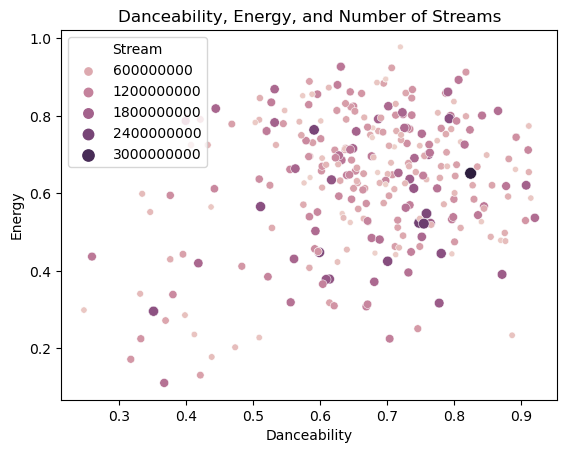

In [33]:
sns.scatterplot(data=final_df, x='Danceability', y='Energy', size='Stream', hue='Stream')
plt.title('Danceability, Energy, and Number of Streams')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()